In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
def solve_bvp_fd(N):
    """
    N is the number of interior point
    """
    h = 1.0 / (N + 1)
    x = np.linspace(h, 1 - h, N)

    # Setup tridiagonal matrix A
    diag = 2.0 + (np.pi * h)**2
    off_diag = -1.0
    A = np.zeros((N, N))
    np.fill_diagonal(A, diag)
    np.fill_diagonal(A[1:], off_diag)
    np.fill_diagonal(A[:, 1:], off_diag)

    b = 2 * np.pi**2 * np.sin(np.pi * x) * h**2

    u = np.linalg.solve(A, b)
    return x, u

In [23]:
def exact_solution(x):
    """Exact solution u(x) = sin(π x)."""
    return np.sin(np.pi * x)

In [24]:
N_list = [9, 19, 39, 79]
results = []

for N in N_list:
    x, u_num = solve_bvp_fd(N)
    diff = abs(u_num - exact_solution(x))
    E_n = np.max(diff)
    h = 1.0 / (N + 1)
    results.append({'N': N, 'h': h, 'E': E_n})

# compute error ratios
for k in range(1, len(results)):
    results[k]['ratio'] = results[k-1]['E'] / results[k]['E']
results[0]['ratio'] = np.nan  

df = pd.DataFrame(results, columns=['N', 'h', 'E', 'ratio'])
print("\nError table:")
print(df.to_string(index=False, float_format="%.3e"))


Error table:
 N         h         E     ratio
 9 1.000e-01 4.116e-03       NaN
19 5.000e-02 1.028e-03 4.002e+00
39 2.500e-02 2.570e-04 4.001e+00
79 1.250e-02 6.426e-05 4.000e+00


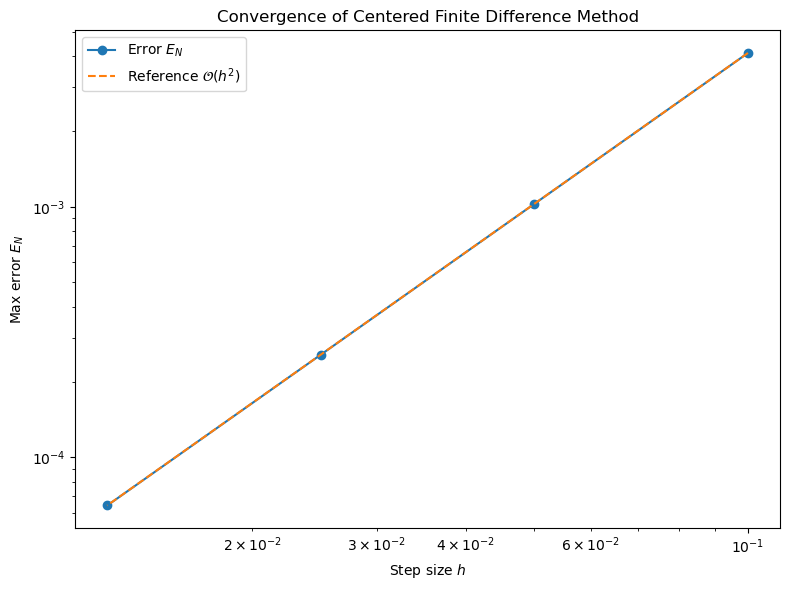

In [25]:
h_vals = df['h'].values
E_vals = df['E'].values

plt.figure(figsize=(8,6))
plt.loglog(h_vals, E_vals, 'o-', label='Error $E_N$')
# reference line ~ h^2
C = E_vals[0] / h_vals[0]**2
plt.loglog(h_vals, C*h_vals**2, '--', label=r'Reference $\mathcal{O}(h^2)$')

plt.xlabel('Step size $h$')
plt.ylabel('Max error $E_N$')
plt.title('Convergence of Centered Finite Difference Method')
plt.legend()
# plt.grid(True)
plt.tight_layout()
plt.show()

From this plot, the convergence rate perfectly matches the theoratical predition of second order convergence.